In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [10]:
#BaseURL

url= f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"  
units = "imperial"

#Build partial query URl
query_url = f"{url}&q="
pprint.pprint(requests.get(query_url).json())
#print(query_url)


{'cod': '400', 'message': 'Nothing to geocode'}


In [11]:
print(cities)

['avarua', 'dakar', 'rikitea', 'albany', 'harlingen', 'san patricio', 'saint-jean-port-joli', 'dikson', 'saint anthony', 'kapaa', 'kodiak', 'vaini', 'mataura', 'vitim', 'dauphin', 'ushuaia', 'lebu', 'kaohsiung', 'muros', 'snezhnogorsk', 'nagua', 'tambura', 'saint-denis', 'halifax', 'krasnoselkup', 'beyneu', 'taolanaro', 'andevoranto', 'formoso do araguaia', 'hobart', 'airai', 'tasiilaq', 'saint-leu', 'praia da vitoria', 'san-pedro', 'gornyy', 'doctor pedro p. pena', 'tsihombe', 'portland', 'nhulunbuy', 'coquimbo', 'aguimes', 'east london', 'okhotsk', 'georgetown', 'birao', 'mar del plata', 'butaritari', 'iqaluit', 'hermanus', 'busselton', 'bluff', 'port elizabeth', 'atuona', 'upernavik', 'norman wells', 'barentsburg', 'puerto ayora', 'gunjur', 'barrow', 'broome', 'narsaq', 'tabas', 'yuci', 'wahran', 'cherskiy', 'lahij', 'alofi', 'palmer', 'belushya guba', 'manjacaze', 'carnarvon', 'saleaula', 'clyde river', 'kargasok', 'cape town', 'mahebourg', 'palabuhanratu', 'cap malheureux', 'bayki

In [12]:
 

cloud=[]
cityname=[]
country=[]
humid=[]
lat = []
longi=[]
temp = []
wind=[]
count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response['name'])
        lat.append(response['coord']['lat'])
        longi.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
    
        print(f"The latitude information received is: {lat[count]}")
        count = count + 1
        
    except KeyError:
        print("City is not found")
    
   
    


The latitude information received is: -21.21
The latitude information received is: 14.69
The latitude information received is: -23.12
The latitude information received is: 42.6
The latitude information received is: 26.19
The latitude information received is: 19.22
The latitude information received is: 47.22
The latitude information received is: 73.51
The latitude information received is: 45.02
The latitude information received is: 22.08
The latitude information received is: 57.79
The latitude information received is: -21.2
The latitude information received is: -46.19
The latitude information received is: 59.45
The latitude information received is: 51.15
The latitude information received is: -54.8
The latitude information received is: -37.62
The latitude information received is: 22.62
The latitude information received is: 42.78
The latitude information received is: 69.19
The latitude information received is: 19.38
The latitude information received is: 5.6
The latitude information receiv

The latitude information received is: -17.53
The latitude information received is: 46.36
The latitude information received is: 49.28
The latitude information received is: 47.97
The latitude information received is: -21.15
City is not found
The latitude information received is: 18.9
The latitude information received is: 60.38
The latitude information received is: 49.78
The latitude information received is: 60.14
The latitude information received is: 34.67
The latitude information received is: 51.03
The latitude information received is: -27.37
The latitude information received is: 64.86
The latitude information received is: -10.45
The latitude information received is: -33.3
The latitude information received is: 34.57
The latitude information received is: 50.7
City is not found
The latitude information received is: 36.93
The latitude information received is: 37.1
The latitude information received is: 20.45
City is not found
The latitude information received is: -2.08
The latitude informat

The latitude information received is: -5.55
The latitude information received is: -14.41
The latitude information received is: 40.77
The latitude information received is: 48.65
The latitude information received is: 9.49
City is not found
The latitude information received is: 42.78
The latitude information received is: 52.61
The latitude information received is: -5.25
The latitude information received is: -17.47
The latitude information received is: 40.52
The latitude information received is: 43.21
City is not found
City is not found
City is not found
The latitude information received is: -14.47
The latitude information received is: 41.83
The latitude information received is: 14.04
City is not found
The latitude information received is: 38.52
The latitude information received is: 48.11
The latitude information received is: 8.08
The latitude information received is: 32.09
The latitude information received is: 55.34
City is not found
The latitude information received is: -30.98
The latitu

The latitude information received is: -33.75
The latitude information received is: 59.37
The latitude information received is: 51.55
The latitude information received is: 27.02
The latitude information received is: -20.01
The latitude information received is: -21.64
The latitude information received is: -5.55
The latitude information received is: 14.2
The latitude information received is: 16.86


In [13]:
#Create data frame

responses_df= pd.DataFrame({
    'City':cityname,
    'Temperature':temp,
    'Humidity':humid,
    'Cloudiness':cloud,
    'Wind Speed':wind,
    'Latitude':lat,
    'Longitude': longi})

responses_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Avarua,300.15,69,47,2.60,-21.21,-159.78
1,Dakar,292.74,82,45,7.20,14.69,-17.44
2,Rikitea,298.49,69,82,4.02,-23.12,-134.97
3,Albany,274.88,81,0,2.39,42.60,-73.97
4,Harlingen,298.47,83,40,2.60,26.19,-97.70


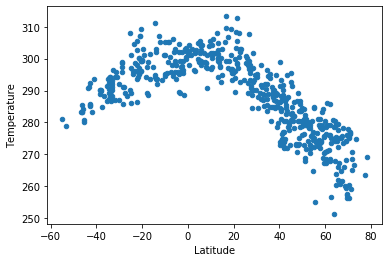

In [14]:
#Scatterplot showing relationship between Temperature and Latitude
responses_df.plot.scatter('Latitude', 'Temperature',s=None,c=None,)

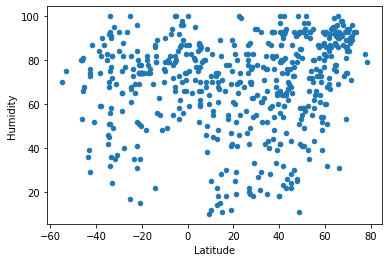

In [15]:
#Scatterplot showing relationship between Humidity and Latitude
responses_df.plot.scatter('Latitude', 'Humidity',s=None,c=None,)

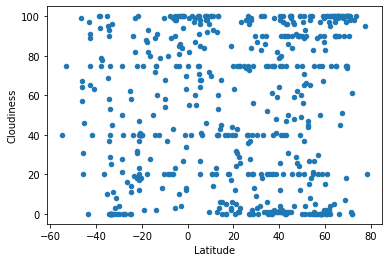

In [16]:
#Scatterplot showing relationship between Cloudiness and Latitude
responses_df.plot.scatter('Latitude', 'Cloudiness',s=None,c=None,)

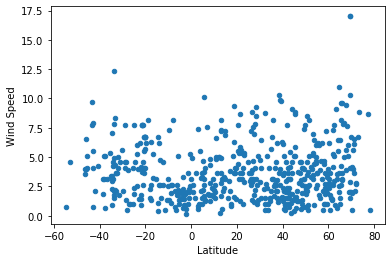

In [17]:
#Scatterplot showing relationship between Wind Speed and Latitude
responses_df.plot.scatter('Latitude', 'Wind Speed',s=None,c=None,)

In [18]:
responses_df.head()


,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Avarua,300.15,69,47,2.60,-21.21,-159.78
1,Dakar,292.74,82,45,7.20,14.69,-17.44
2,Rikitea,298.49,69,82,4.02,-23.12,-134.97
3,Albany,274.88,81,0,2.39,42.60,-73.97
4,Harlingen,298.47,83,40,2.60,26.19,-97.70


In [21]:
#Dataframes for northern and southern hemispheres

northernhemi_df = responses_df.loc[responses_df["Latitude"] >= 0, :]
southernhemi_df = responses_df.loc[responses_df["Latitude"] < 0, :]



,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
1,Dakar,292.74,82,45,7.20,14.69,-17.44
3,Albany,274.88,81,0,2.39,42.60,-73.97
4,Harlingen,298.47,83,40,2.60,26.19,-97.70
5,San Patricio,296.72,75,44,3.68,19.22,-104.70
6,St-Jean-Port-Joli,273.00,91,29,2.77,47.22,-70.27
...,...,...,...,...,...,...,...
537,Shuyskoye,275.80,77,87,0.96,59.37,41.03
538,Skibbereen,281.15,100,90,5.10,51.55,-9.27
539,Lampazos de Naranjo,297.36,70,37,3.04,27.02,-100.52
543,Kutum,297.53,15,43,3.31,14.20,24.67


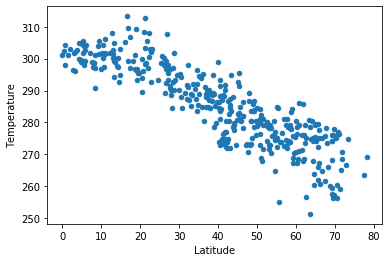

In [22]:
#Scatterplot showing relationship between Temperature and Latitude - NORTHERN HEMISPHERE
northernhemi_df.plot.scatter('Latitude', 'Temperature',s=None,c=None,)

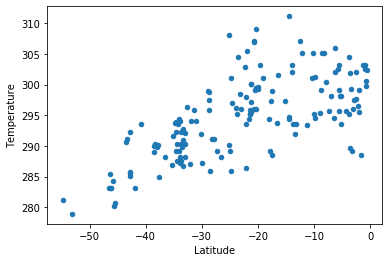

In [23]:
#Scatterplot showing relationship between Temperature and Latitude - SOUTHERN HEMISPHERE
southernhemi_df.plot.scatter('Latitude', 'Temperature',s=None,c=None,)

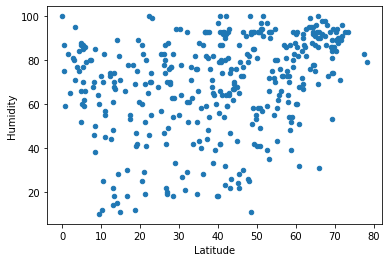

In [24]:
#Scatterplot showing relationship between Humidity and Latitude - NORTHERN HEMISPHERE
northernhemi_df.plot.scatter('Latitude', 'Humidity',s=None,c=None,)

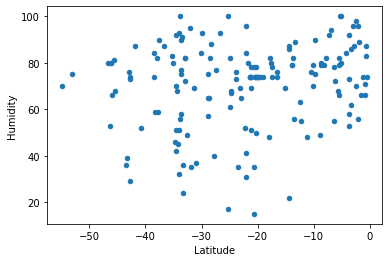

In [25]:
#Scatterplot showing relationship between Humidity and Latitude - SOUTHERN HEMISPHERE
southernhemi_df.plot.scatter('Latitude', 'Humidity',s=None,c=None,)

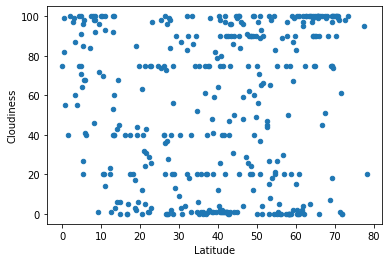

In [26]:
#Scatterplot showing relationship between Cloudiness and Latitude - NORTHERN HEMISPHERE
northernhemi_df.plot.scatter('Latitude', 'Cloudiness',s=None,c=None,)

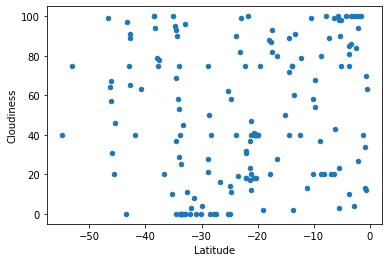

In [27]:
#Scatterplot showing relationship between Cloudiness and Latitude - SOUTHERN HEMISPHERE
southernhemi_df.plot.scatter('Latitude', 'Cloudiness',s=None,c=None,)

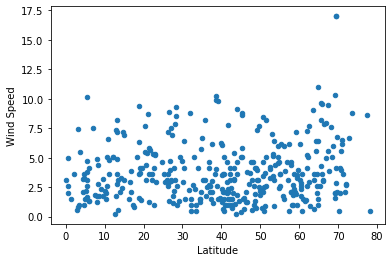

In [28]:
#Scatterplot showing relationship between Wind Speed and Latitude - NORTHERN HEMISPHERE
northernhemi_df.plot.scatter('Latitude', 'Wind Speed',s=None,c=None,)

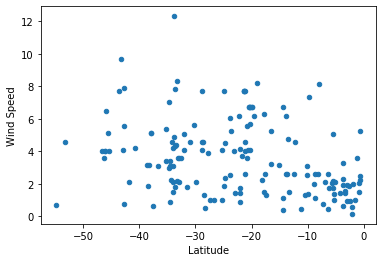

In [29]:
#Scatterplot showing relationship between Wind Speed and Latitude - SOUTHERN HEMISPHERE
southernhemi_df.plot.scatter('Latitude', 'Wind Speed',s=None,c=None,)